In [76]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import xlrd

In [2]:
import pandas as pd 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load Dataset

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped       1         2     2003  ...   
1       5/7/2003 0:00   Shipped       2         5     2003  ...   
2       7/1/2003 0:00   Shipped       3         7     2003  ...   
3      8/25/2003 0:00   Shipped       3         8     2003  ...   
4     10/10/2003 0:00   Shipped       4        10     2003  ...   
...               ...       ...     ...       ...      ...  ...   
2818   12/2/2004 0:00   Shipped       4        12     2004  ...   
2819   1/31/2005 0:00   Shipped       1         1     2005  ...   
2820    3/1/2005 0:00  Resolved       1         3     2005  ...   
2821   3/28/2005 0:00   Shipped       1         3     2005  ...   
2822    5/6/2005 0:00   On Hold       2         5     2005  ...   

                       ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0           897 Long Airport Avenue           NaN            NYC    NY   
1                59 rue de l'Abbaye           NaN          Reims   NaN   
2     27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3                78934 Hillside Dr.           NaN       Pasadena    CA   
4                   7734 Strong St.           NaN  San Francisco    CA   
...                             ...           ...            ...   ...   
2818             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2819                    Torikatu 38           NaN           Oulu   NaN   
2820             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2821          1 rue Alsace-Lorraine           NaN       Toulouse   NaN   
2822             8616 Spinnaker Dr.           NaN         Boston    MA   

     POSTALCODE  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         10022      USA       NaN              Yu             Kwai    Small  
1         51100   France      EMEA         Henriot             Paul    Small  
2         75508   France      EMEA        Da Cunha           Daniel   Medium  
3         90003      USA       NaN           Young            Julie   Medium  
4           NaN      USA       NaN           Brown            Julie   Medium  
...         ...      ...       ...             ...              ...      ...  
2818      28034    Spain      EMEA          Freyre            Diego    Small  
2819      90110  Finland      EMEA       Koskitalo           Pirkko   Medium  
2820      28034    Spain      EMEA          Freyre            Diego   Medium  
2821      31000   France      EMEA          Roulet          Annette    Small  
2822      51003      USA       NaN         Yoshido             Juri   Medium  

[2823 rows x 25 columns]

# Explore data structure, Identify duplicates, Null values

In [4]:
duplicates_count = df.duplicated().sum()
print(duplicates_count)

0


In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Cleaning Dataset 

In [6]:
data = df.dropna()
data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

# Transformation Tasks

In [7]:
unique_values = np.unique(df['STATUS'])
print(unique_values)

['Cancelled' 'Disputed' 'In Process' 'On Hold' 'Resolved' 'Shipped']


In [8]:
df.replace(to_replace=['Cancelled','Disputed','In Process','On Hold','Resolved','Shipped'], value=[1,2,3,4,5,6],inplace=True)
df['STATUS']

C:\Users\yashz\AppData\Local\Temp\ipykernel_10776\1564851889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['Cancelled','Disputed','In Process','On Hold','Resolved','Shipped'], value=[1,2,3,4,5,6],inplace=True)


0       6
1       6
2       6
3       6
4       6
       ..
2818    6
2819    6
2820    5
2821    6
2822    4
Name: STATUS, Length: 2823, dtype: int64

# Analyze the sales data by performing 
+ descriptive statistics
+ aggregating data by specific variables
+ calculating metrics such as total sales
+ average order value
+ product category distribution.

# Descriptive Statistics

In [9]:
sales_summary = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].describe()
print("Descriptive Statistics for Sales Data:\n", sales_summary)

Descriptive Statistics for Sales Data:
               SALES  QUANTITYORDERED    PRICEEACH
count   2823.000000      2823.000000  2823.000000
mean    3553.889072        35.092809    83.658544
std     1841.865106         9.741443    20.174277
min      482.130000         6.000000    26.880000
25%     2203.430000        27.000000    68.860000
50%     3184.800000        35.000000    95.700000
75%     4508.000000        43.000000   100.000000
max    14082.800000        97.000000   100.000000


# aggregating data by specific variables
+ Sales per country
+ Sales over months
+ Sales over ProductLine

In [10]:
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("Sales by Country:\n", sales_by_country)

Sales by Country:
 COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64


In [11]:
sales_by_country = df.groupby('MONTH_ID')['SALES'].sum().sort_values(ascending=False)
print("Sales by Months:\n", sales_by_country)

Sales by Months:
 MONTH_ID
11    2118885.67
10    1121215.22
5      923972.56
2      810441.90
1      785874.44
3      754501.39
4      669390.96
8      659310.57
12     634679.12
9      584724.27
7      514875.97
6      454756.78
Name: SALES, dtype: float64


In [12]:
sales_by_category = df.groupby('PRODUCTLINE')['SALES'].sum()
print("Sales by Product Category:\n", sales_by_category)

Sales by Product Category:
 PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64


# calculating metrics such as total sales

In [13]:
total_sales = df['SALES'].sum()
print("Total Sales:", total_sales)

Total Sales: 10032628.85


# Average Order Value (AOV)

In [14]:
average_order_value = df['SALES'].mean()
print("Average Order Value (AOV):", average_order_value)


Average Order Value (AOV): 3553.889071909316


# product category distribution

In [15]:
product_distribution = df['PRODUCTLINE'].value_counts(normalize=True) * 100
print("Product Category Distribution (%):\n", product_distribution)

Product Category Distribution (%):
 PRODUCTLINE
Classic Cars        34.254339
Vintage Cars        21.501948
Motorcycles         11.725115
Planes              10.839532
Trucks and Buses    10.662416
Ships                8.289054
Trains               2.727595
Name: proportion, dtype: float64


# Visualize 
+ Pie Chart
+ Boxplot

In [16]:
Values = df['PRODUCTLINE'].value_counts(normalize=True) * 100
category = Values.index

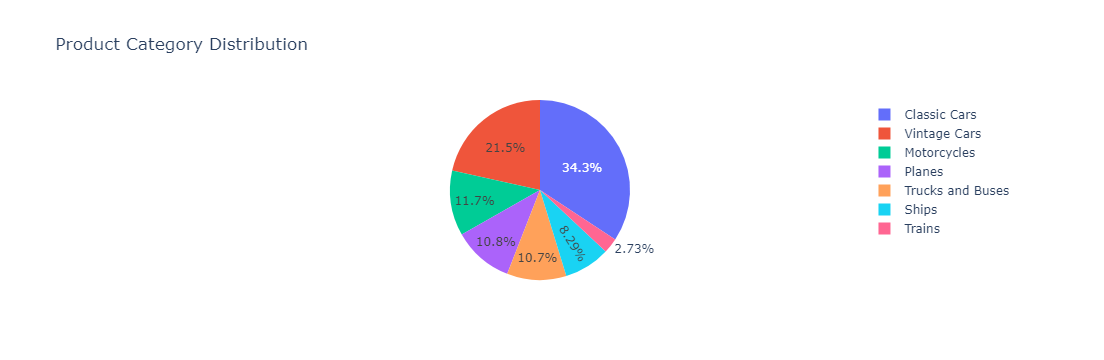

In [17]:
fig = px.pie(df, values=Values, names=category, title='Product Category Distribution')
fig.show()

<Axes: xlabel='TERRITORY', ylabel='QUANTITYORDERED'>

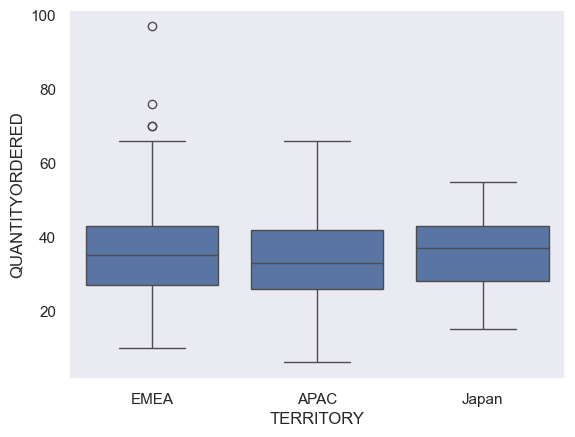

In [18]:
sns.set_theme(style="dark")
sns.boxplot(x = 'TERRITORY', y = 'QUANTITYORDERED', data = df)

# XLS Format

In [19]:
file = pd.read_excel('Sample - Superstore.xls') 
file.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

# Into DataFrame

In [20]:
df1 = pd.DataFrame(file)
df1

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.

In [21]:
Regions = df1['Region']
Discount = df1['Discount']

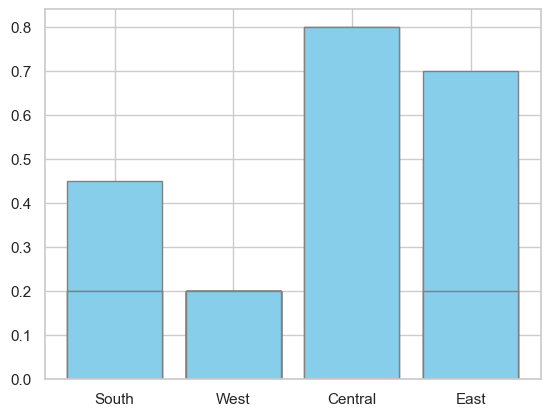

In [22]:
sns.set_theme(style="whitegrid")
plt.bar(Regions[0:30],Discount[0:30],color='skyblue', edgecolor='gray')
plt.show()

# JSON FORMAT - same like WeatherAPi 

In [23]:
with open("customers.json",'r') as J :
    content = json.load(J)
    print(json.dumps(content,indent=4))

[
    {
        "id": 1,
        "email": "isidro_von@hotmail.com",
        "first": "Torrey",
        "last": "Veum",
        "company": "Hilll, Mayert and Wolf",
        "created_at": "2014-12-25T04:06:27.981Z",
        "country": "Switzerland"
    },
    {
        "id": 2,
        "email": "frederique19@gmail.com",
        "first": "Micah",
        "last": "Sanford",
        "company": "Stokes-Reichel",
        "created_at": "2014-07-03T16:08:17.044Z",
        "country": "Democratic People's Republic of Korea"
    },
    {
        "id": 3,
        "email": "fredy54@gmail.com",
        "first": "Hollis",
        "last": "Swift",
        "company": "Rodriguez, Cartwright and Kuhn",
        "created_at": "2014-08-18T06:15:16.731Z",
        "country": "Tunisia"
    },
    {
        "id": 4,
        "email": "braxton29@hotmail.com",
        "first": "Perry",
        "last": "Leffler",
        "company": "Sipes, Feeney and Hansen",
        "created_at": "2014-07-10T11:31:40.235Z",
       

In [24]:
id = [data['id'] for data in content]
email = [data['email'] for data in content]
first = [data['first'] for data in content]
last = [data['last'] for data in content]
company = [data['company'] for data in content]
created_at = [data['created_at'] for data in content]
country = [data['country'] for data in content]

In [25]:
df2 = pd.DataFrame({
    "ID" : id,
    "Email" : email,
    "First" : first,
    "Last" : last,
    "Company" : company,
    "Created_at" : created_at,
    "Country" : country,
    
})
df2

ID                          Email       First      Last  \
0        1         isidro_von@hotmail.com      Torrey      Veum   
1        2         frederique19@gmail.com       Micah   Sanford   
2        3              fredy54@gmail.com      Hollis     Swift   
3        4          braxton29@hotmail.com       Perry   Leffler   
4        5             turner59@gmail.com     Janelle   Hagenes   
...    ...                            ...         ...       ...   
9994  9995  delores_cruickshank@gmail.com      Robert      Batz   
9995  9996     marley_brown32@hotmail.com       Leone   Reinger   
9996  9997          raymond68@hotmail.com  Clementina      Bode   
9997  9998   juston_powlowski@hotmail.com      Yvonne  Prosacco   
9998  9999       orion.senger72@yahoo.com      Darrin  Connelly   

                             Company                Created_at  \
0             Hilll, Mayert and Wolf  2014-12-25T04:06:27.981Z   
1                     Stokes-Reichel  2014-07-03T16:08:17.044Z   
2     Rodriguez, Cartwright and Kuhn  2014-08-18T06:15:16.731Z   
3           Sipes, Feeney and Hansen  2014-07-10T11:31:40.235Z   
4                Lesch and Daughters  2014-04-21T15:05:43.229Z   
...                              ...                       ...   
9994                  Carter-Tillman  2014-04-02T19:13:57.592Z   
9995           Smitham and Daughters  2014-07-01T18:45:06.223Z   
9996                   VonRueden LLC  2014-06-12T18:38:54.222Z   
9997                       Green Inc  2015-02-04T18:54:09.035Z   
9998              Funk and Daughters  2015-01-21T11:20:51.483Z   

                                    Country  
0                               Switzerland  
1     Democratic People's Republic of Korea  
2                                   Tunisia  
3                                      Chad  
4                                 Swaziland  
...                                     ...  
9994                                  Yemen  
9995                              Argentina  
9996       Lao People's Democratic Republic  
9997          Holy See (Vatican City State)  
9998                                  Niger  

[9999 rows x 7 columns]

In [26]:
df2.isnull().sum()

ID            0
Email         0
First         0
Last          0
Company       0
Created_at    0
Country       0
dtype: int64

In [35]:
User = df2['ID']
created_at = df2['Created_at']

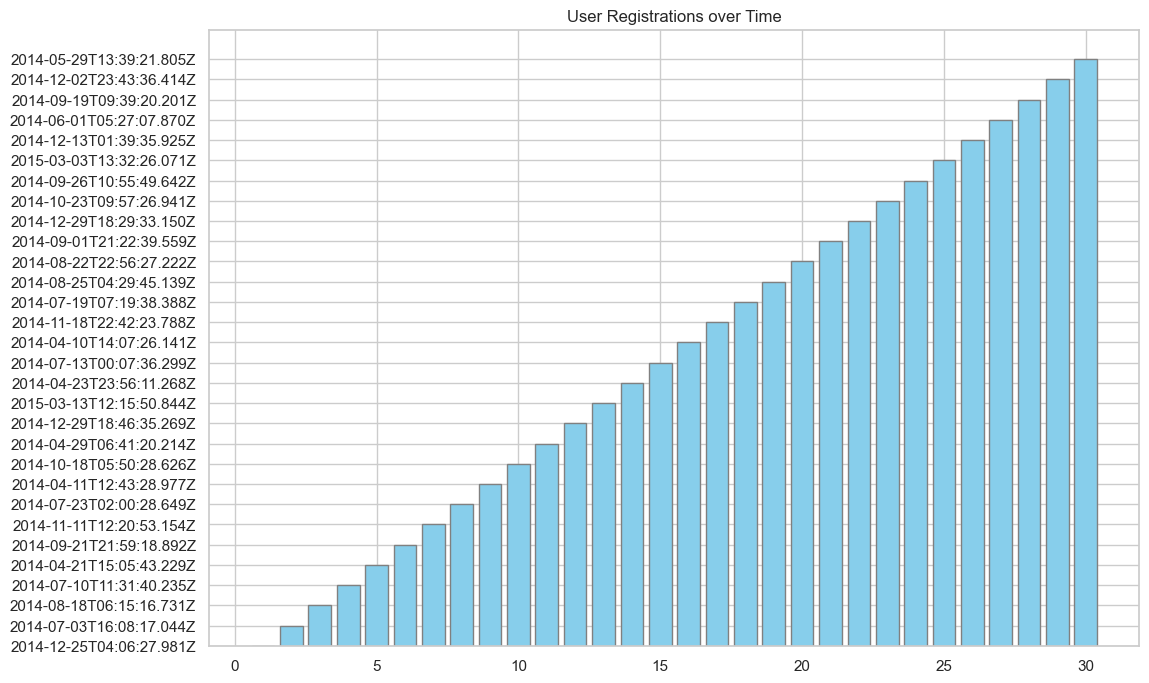

In [46]:
plt.figure(figsize=(12,8))
plt.grid(True)
sns.set_theme(style="whitegrid")
plt.title('User Registrations over Time')
plt.bar(User[0:30],created_at[0:30],color='skyblue', edgecolor='gray')
plt.show()